In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

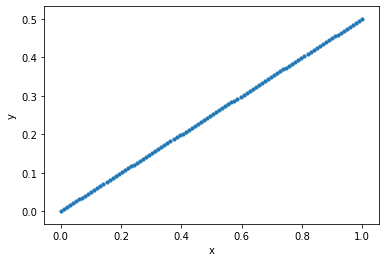

In [2]:
# generate random data-set
np.random.seed(0)
noise = np.random.rand(100)
X = np.linspace(0,1, num=100)
y = np.power(X, 1)*.5+0.0*noise
#y=x^2+ab  Target function  a=0.2


# plot
plt.scatter(X,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 切割測試集與驗證集

In [3]:
from sklearn.model_selection import train_test_split
# X=X.reshape(-1,1)
# y=y.reshape(-1,1)
X_test  = X
y_test = y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)
# mg_series=np.append(trnLbls,chkLbls)

In [4]:
import torch
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = X.pow(2) + 0.2*torch.rand(X.size())   
X_train=X.numpy()
X_val=X.numpy()
y_train=y.numpy()
y_val=y.numpy()

## ANFIS Model

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

Train cost after epoch 0: 0.110003 Validation loss: 0.107801
Train cost after epoch 10: 0.102364 Validation loss: 0.102407
Train cost after epoch 20: 0.101116 Validation loss: 0.101026
Train cost after epoch 30: 0.100996 Validation loss: 0.100963
Train cost after epoch 40: 0.100763 Validation loss: 0.100762
Train cost after epoch 50: 0.100652 Validation loss: 0.100644
Train cost after epoch 60: 0.100598 Validation loss: 0.100592
Train cost after epoch 70: 0.100560 Validation loss: 0.100557
Train cost after epoch 80: 0.100534 Validation loss: 0.100532
Train cost after epoch 90: 0.100516 Validation loss: 0.100514
Train cost after epoch 100: 0.100504 Validation loss: 0.100503
Train cost after epoch 110: 0.100496 Validation loss: 0.100496
Train cost after epoch 120: 0.100491 Vali

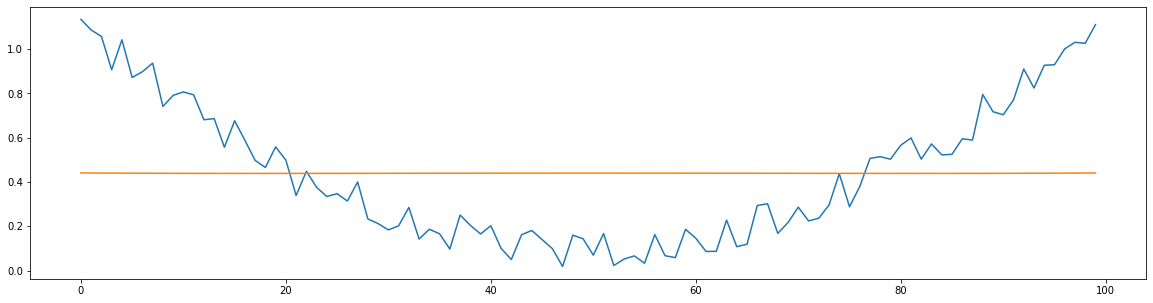

In [5]:
import time
import tensorflow as tf
from anfis import ANFIS

# Generate dataset
D = 1  # number of regressors
T = 1  # delay

# ANFIS params and Tensorflow graph initialization
m = 5  # number of rules
alpha = 0.01 # learning rate

fis = ANFIS(n_inputs=D, n_rules=m, learning_rate=alpha)

# Training
num_epochs = 2000

# Initialize session to make computations on the Tensorflow graph
# Initialize model parameters
sess = tf.Session()
sess.run(fis.init_variables)
trn_costs = []
val_costs = []
time_start = time.time()
for epoch in range(num_epochs):
    #  Run an update step
    trn_loss, trn_pred = fis.train(sess, X_train, y_train)
    # Evaluate on validation set
    val_pred, val_loss = fis.infer(sess, X_val, y_val)
    if epoch % 10 == 0:
        print("Train cost after epoch %i: %f" % (epoch, trn_loss),"Validation loss: %f" % val_loss)
    if epoch == num_epochs - 1:
        time_end = time.time()
        print("Elapsed time: %f" % (time_end - time_start))
        print("Validation loss: %f" % val_loss)
        # Plot real vs. predicted
#             pred = np.vstack((np.expand_dims(trn_pred, 1), np.expand_dims(val_pred, 1)))
        pred = trn_pred
        plt.figure(figsize=(20,5))
        plt.plot(y_train)
        plt.plot(pred)
    trn_costs.append(trn_loss)
    val_costs.append(val_loss)

    

In [5]:
import time
import tensorflow as tf
from anfis import ANFIS
from tensorflow import set_random_seed
set_random_seed(0)

# Generate dataset
D = 1  # number of regressors
T = 1  # delay

# ANFIS params and Tensorflow graph initialization
m = 5  # number of rules
alpha = 0.01 # learning rate

fis = ANFIS(n_inputs=D, n_rules=m, learning_rate=alpha)

sess = tf.Session()
sess.run(fis.init_variables)
# print(sess.run(fis.const_mu))
# print(sess.run(fis.sigma))
# print(sess.run(fis.y))
fis.show(sess,X_train)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

(100,)
[0.3610001  0.36298543 0.3650372  0.36714742 0.3693076  0.37150908
 0.3737429  0.3759999  0.37827075 0.38054603 0.38281643 0.38507247
 0.38730487 0.3895042  0.39166144 0.39376765 0.39581418 0.39779243
 0.3996943  0.401512   0.40323773 0.40486446 0.40638524 0.4077938
 0.40908387 0.41024986 0.41128647 0.41218895 0.41295278 0.41357404
 0.41404903 0.41437483 0.4145485  0.4145678  0.41443104 0.4141366
 0.41368353 0.41307127 0.4122997  0.4113691  0.41028017 0.40903413
 0.40763256 0.4060774  0.4043712  0.40251684 0.40051755 0.39837715
 0.39609987 0.39369017 0.3911532  0.3884943  0.3857194  0.3828347
 0.37984678 0.37676254 0.37358952 0.37033507 0.36700734 0.36361453
 0.360165   0.35666743 0.35313073 0.3495639  0.34597588 0.3423759
 0.33877304 0.33517644 0.33159503 0.32803774 0

In [ ]:
pred=fis.infer(sess, X_test)
# plot
plt.scatter(X_test,pred, color='r', s=10, label='Predicted')
plt.scatter(X_test, y_test, s=10, label='True')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
plt.plot(np.squeeze(trn_costs))
plt.plot(np.squeeze(val_costs))
plt.title('Train History')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
# plt.savefig('./model/exp6-loss.png')
plt.show()

In [ ]:
# Plot the cost over epochs
plt.figure(2)
plt.subplot(2, 1, 1)
plt.plot(np.squeeze(trn_costs))
plt.title("Training loss, Learning rate =" + str(alpha))
plt.subplot(2, 1, 2)
plt.plot(np.squeeze(val_costs))
plt.title("Validation loss, Learning rate =" + str(alpha))
plt.ylabel('Cost')
plt.xlabel('Epochs')
# Plot resulting membership functions
fis.plotmfs(sess)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
print('訓練集')
pred=fis.infer(sess, X_train)
pred=[0 if x<0 else x for x in pred]
pred=[1 if x>1 else x for x in pred]
print("MAE: ",mean_absolute_error(y_train[:,0:1],pred))
print("MSE: ",(mean_squared_error(y_train[:,0:1],pred)))
print("RMSE: ",sqrt(mean_squared_error(y_train[:,0:1],pred)))
print('驗證集')
pred=fis.infer(sess, X_val)
pred=[0 if x<0 else x for x in pred]
pred=[1 if x>1 else x for x in pred]
print("MAE: ",mean_absolute_error(y_val[:,0:1],pred))
print("MSE: ",(mean_squared_error(y_val[:,0:1],pred)))
print("RMSE: ",sqrt(mean_squared_error(y_val[:,0:1],pred)))
print('測試集')
pred=fis.infer(sess, X_test)
pred=[0 if x<0 else x for x in pred]
pred=[1 if x>1 else x for x in pred]
print("MAE: ",mean_absolute_error(y_test[:,0:1],pred))
print("MSE: ",(mean_squared_error(y_test[:,0:1],pred)))
print("RMSE: ",sqrt(mean_squared_error(y_test[:,0:1],pred)))

## Save Model

In [ ]:
# fis.save_model(sess,"./model")
# saver = tf.train.Saver()
# saver.save(sess, "./model/ANFIS-model")

# https://ithelp.ithome.com.tw/articles/10187786

## Load Model

In [ ]:
import tensorflow as tf

n_inputs = 6
n_rules = 128
inputs = tf.placeholder(tf.float32, shape=(None, n_inputs))  # Input
targets = tf.placeholder(tf.float32, shape=None)  # Desired output
mu = tf.get_variable("mu", [n_rules * n_inputs])  # Means of Gaussian MFS
sigma = tf.get_variable("sigma", [n_rules * n_inputs])  # Standard deviations of Gaussian MFS
y = tf.get_variable("y", [1, n_rules])  # Sequent centers

params = tf.trainable_variables()

rul = tf.reduce_prod(
    tf.reshape(tf.exp(-0.5 * tf.square(tf.subtract(tf.tile(inputs, (1, n_rules)), mu)) / tf.square(sigma)),
               (-1, n_rules, n_inputs)), axis=2)  # Rule activations
# Fuzzy base expansion function:
num = tf.reduce_sum(tf.multiply(rul, y), axis=1)
den = tf.clip_by_value(tf.reduce_sum(rul, axis=1), 1e-12, 1e12)
out = tf.divide(num, den)


with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./model/ANFIS-model.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./model')) #載入最近一次儲存的ckpt
    #初始化引數
    sess.run(tf.global_variables_initializer())
    print(sess.run(out))
#     sess.run(out, feed_dict={inputs: chkData})

In [ ]:
# 內部測試
pred_black=fis.infer(sess, trnData)
plt.figure(1)
plt.figure(figsize=(20,5))
plt.plot(trnLbls[0:25,0:1],c='r')
plt.plot(pred_black[0:25],c='b')
pred_white=abs(1-pred_black)
# plt.figure(2)
# plt.figure(figsize=(20,5))
plt.plot(trnLbls[0:25,1:2],c='r')
plt.plot(pred_white[0:25],c='b')

In [ ]:
pred_black=fis.infer(sess, chkData)
plt.figure(1)
plt.figure(figsize=(20,5))
plt.plot(chkLbls[0:25,0:1],c='r')
plt.plot(pred_black[0:25],c='b')
pred_white=abs(1-pred_black)
# plt.figure(2)
# plt.figure(figsize=(20,5))
plt.plot(chkLbls[0:25,1:2],c='r')
plt.plot(pred_white[0:25],c='b')

In [ ]:
# 內部測試
gameID='12'
data = pd.read_csv("../data/trainData/GameDataG"+gameID+".csv") #load the dataset

# 檢查缺失值
print("Before data clean(NAN mount):",len(np.where(np.isnan(data))[0]))
data=data.dropna()
print("After data clean(NAN mount):",len(np.where(np.isnan(data))[0]))
# 正規化 MinMaxScaler
# data['DBSN']=min_max_scaler.fit_transform(data['DBSN'].values.reshape(-1,1)).reshape(1,-1)[0]
# data['DWSN']=min_max_scaler.fit_transform(data['DBSN'].values.reshape(-1,1)).reshape(1,-1)[0]
data['DBSN']=quantile_scaler.fit_transform(data['DBSN'].values.reshape(-1,1)).reshape(1,-1)[0]
data['DWSN']=quantile_scaler.fit_transform(data['DWSN'].values.reshape(-1,1)).reshape(1,-1)[0]


X  = data.drop(['EBWR','EWWR','MoveNo'],axis=1).values
y = data[['EBWR','EWWR']].values


In [ ]:
xbPreds_black =fis.infer(sess, X)
plt.figure(1)
plt.figure(figsize=(20,5))
plt.plot(y[:,0:1],c='k',label='EBWR(DO)')
plt.plot(xbPreds_black,'--',c='k',label='EBWR(AL)')
xbPreds_white=abs(1-xbPreds_black)
plt.plot(y[:,1:2],c='r',label='EWWR(DO)')
plt.plot(xbPreds_white,'--',c='r',label='EWWR(AL)')
plt.legend(loc='lower left')
step=2
arr=np.arange(start=0, stop=len(X)*2, step=4)*step
plt.xticks(np.arange(0,len(arr)*2,2*step),(arr))
title="Game"+gameID+" Training Data"
plt.title(title)
plt.savefig('../screenshot/'+title+'(v5).png')

In [ ]:
# 外部測試
gameID='46'
data = pd.read_csv("../data/testData/GameDataG"+gameID+".csv") #load the dataset

# 檢查缺失值
print("Before data clean(NAN mount):",len(np.where(np.isnan(data))[0]))
data=data.dropna()
print("After data clean(NAN mount):",len(np.where(np.isnan(data))[0]))
# 正規化 MinMaxScaler
# data['DBSN']=min_max_scaler.fit_transform(data['DBSN'].values.reshape(-1,1)).reshape(1,-1)[0]
# data['DWSN']=min_max_scaler.fit_transform(data['DBSN'].values.reshape(-1,1)).reshape(1,-1)[0]
data['DBSN']=quantile_scaler.fit_transform(data['DBSN'].values.reshape(-1,1)).reshape(1,-1)[0]
data['DWSN']=quantile_scaler.fit_transform(data['DWSN'].values.reshape(-1,1)).reshape(1,-1)[0]


X  = data.drop(['EBWR','EWWR','MoveNo'],axis=1).values
y = data[['EBWR','EWWR']].values


In [ ]:
xbPreds_black =fis.infer(sess, X)
plt.figure(1)
plt.figure(figsize=(20,5))
plt.plot(y[:,0:1],c='k',label='EBWR(DO)')
plt.plot(xbPreds_black,'--',c='k',label='EBWR(AL)')
xbPreds_white=abs(1-xbPreds_black)
plt.plot(y[:,1:2],c='r',label='EWWR(DO)')
plt.plot(xbPreds_white,'--',c='r',label='EWWR(AL)')
plt.legend(loc='lower left')
step=2
arr=np.arange(start=0, stop=len(X)*2, step=4)*step
plt.xticks(np.arange(0,len(arr)*2,2*step),(arr))
title="Game"+gameID+" Training Data"
plt.title(title)
plt.savefig('../screenshot/'+title+'(v5).png')